In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
t=np.loadtxt('halosprop.dat')

In [18]:
np.max(t[:,7])

113363.0

In [19]:
cut, = np.where(t[:,7]>50000)
cut

array([36796, 51991, 52085, 52091, 52092])

In [33]:
cut, = np.where((t[:,7]>3000) & (t[:,7]<3500))
cut

array([ 1462,  1489,  1500,  3883,  6507,  6511,  7468, 10138, 11075,
       12561, 16995, 22483, 24503, 24505, 24684, 28022, 29949, 30541,
       32938, 32951, 32952, 36754, 37042, 38159, 39252, 41751, 41754,
       41755, 44523, 46465, 47468, 47905, 52089, 52552, 52554, 55483,
       55488, 55490, 55491, 56651, 61160, 61199, 61709, 61896, 63244,
       65563, 65616, 66849, 74501, 74510, 78334, 78341, 82236, 82243,
       82252, 83509, 83514, 84204, 84770, 85513, 85522, 86927])

In [18]:

print('id del halo',t[cut,9])


id del halo [ 1837.  5862. 18960. 20658. 20719. 23506. 25170. 29508. 36994. 37642.
 38677. 41388. 45234. 45236. 52310. 52309. 53881. 53897. 54350. 55717.
 65076. 65091. 77936. 77931. 80173. 82365. 82366. 83931. 84200. 84333.]


In [113]:
t[cut,7]

array([ 63051.,  73282., 113363.,  96060.,  90179.])

In [2]:
s = np.loadtxt('galaxy_st.dat')
g = np.loadtxt('galaxy_gs.dat')
m = np.loadtxt('galaxy_dm.dat')

In [29]:
s = np.loadtxt('fort.10')
g = np.loadtxt('fort.11')
m = np.loadtxt('fort.12')

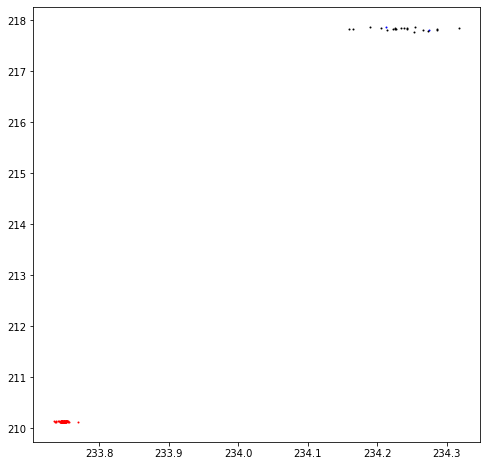

In [30]:
plt.figure(figsize=(8,8))


plt.scatter(g[:,0],g[:,1],s=1,color='blue')
plt.scatter(m[:,0],m[:,1],s=1,color='black')
plt.scatter(s[:,0],s[:,1],s=1,color='red')
#plt.xlim(228.7,229.5)
#plt.ylim(230.5,231.5)

In [5]:
%pylab inline
import pynbody
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sphviewer.tools import QuickView, Blend

Populating the interactive namespace from numpy and matplotlib


In [31]:
pos_dm = m
pos_gs = g
pos_st = s

In [7]:
def get_normalized_image(image):
        image = (image-np.min(image))/(np.max(image)-np.min(image))
        return image

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/arodriguez/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


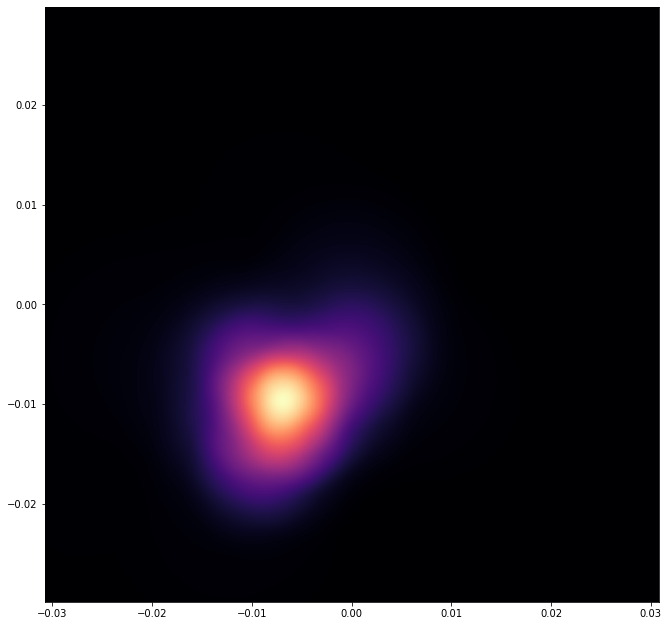

In [32]:
plt.figure(figsize=(11,11))

pos1=pos_gs
pos2=pos_st
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000,nb=56)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000)

image1 = cm.Greys_r(get_normalized_image(qv1.get_image()))
image2 = cm.magma(get_normalized_image(qv2.get_image()))

blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

qv=imshow(screen, origin='top', extent=qv1.get_extent())
plt.show()

#plt.imsave('/home/arodriguez/tesis/halo84333_gs.png', screen)


In [51]:
plt.imsave?

Signature: plt.imsave(fname, arr, **kwargs)
Docstring:
Save an array as an image file.

Parameters
----------
fname : str or PathLike file-like
    A path or a Python file-like object to store the image in.
    If *format* is not set, then the output format is inferred from the
    extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
    If *format* is set, it determines the output format.
arr : array-like
    The image data. The shape can be one of
    MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
vmin, vmax : scalar, optional
    *vmin* and *vmax* set the color scaling for the image by fixing the
    values that map to the colormap color limits. If either *vmin*
    or *vmax* is None, that limit is determined from the *arr*
    min/max value.
cmap : str or `~matplotlib.colors.Colormap`, optional
    A Colormap instance or registered colormap name. The colormap
    maps scalar data to colors. It is ignored for RGB(A) data.
    Defaults to :rc:`image.cmap` ('viridis')

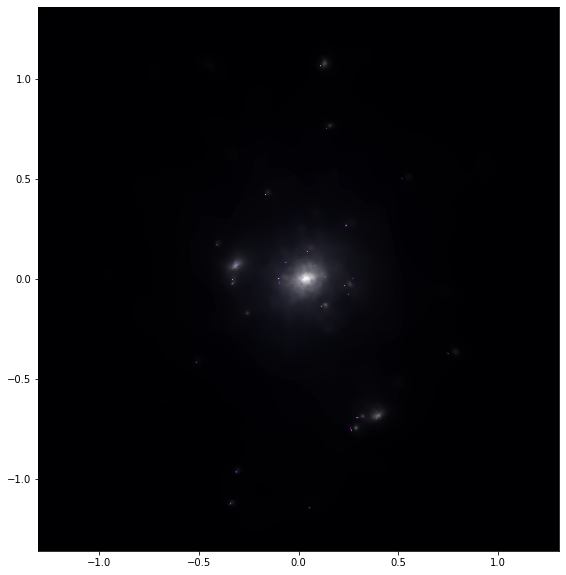

In [54]:
plt.figure(figsize=(10,10))

pos1=pos_dm
pos2=pos_gs
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000) #,nb=500)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,xsize=2000,ysize=2000)

image1 = cm.Greys_r(get_normalized_image(qv1.get_image()))
image2 = cm.magma(get_normalized_image(qv2.get_image()))

blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

imshow(screen, origin='lower', extent=qv1.get_extent())
plt.show()

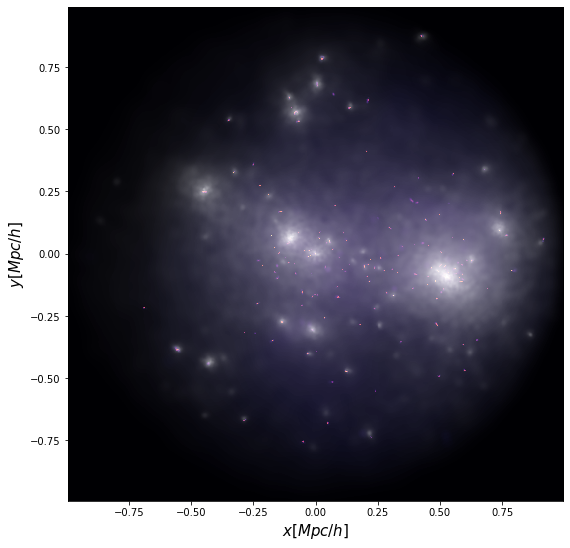

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True, sharex=True)
fig.subplots_adjust(bottom=0.06, left =0.11, right = 0.97, top = 0.97, wspace=0., hspace= 0)

pos1=pos_dm
pos2=pos_gs
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,xsize=1000,ysize=1000) #,nb=500)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,xsize=1000,ysize=1000)

image1 = cm.Greys_r(get_normalized_image(qv1.get_image()))
image2 = cm.magma(get_normalized_image(qv2.get_image()))

blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

ax.imshow(screen, origin='top', extent=qv1.get_extent())
plt.xlabel(r"$x [Mpc/h]$",size=15)
plt.ylabel(r"$y [Mpc/h]$",size=15)
plt.savefig(fname='/home/arodriguez/tesis/sph-viewer/halo0.png',format='png')